In [ ]:
from google.colab import drive
drive.flush_and_unmount()


Drive not mounted, so nothing to flush and unmount.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


##Exploratory data analysis (User)











In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/pd_project/data/processed/"

USER_DATA_PATH = BASE_PATH + "cleaned_user_data.csv"
KEYSTROKES_PATH = BASE_PATH + "final_keystrokes_clean.csv"

# Load user metadata
users_df = pd.read_csv(USER_DATA_PATH)

















In [ ]:
# Read the keystrokes CSV file without specifying usecols
temp_df = pd.read_csv(KEYSTROKES_PATH, nrows=0) # Read only the header
print("Columns in final_keystrokes_clean.csv:", temp_df.columns.tolist())

Columns in final_keystrokes_clean.csv: ['SourceFile', 'UserKey', 'Date', 'Timestamp', 'Hand (L or R)', 'Hold time', 'Direction', 'Latency time', 'Flight time']


In [ ]:
users_df = pd.read_csv(USER_DATA_PATH)

print("Users dataset shape:", users_df.shape)

Users dataset shape: (227, 12)


In [ ]:
keystrokes_df = pd.read_csv(
      KEYSTROKES_PATH,
          usecols=["SourceFile", "UserKey", "Hand (L or R)", "Hold time", "Latency time", "Flight time"],
          dtype={
               "SourceFile": "category",
               "UserKey": "category",
               "Hand (L or R)": "category",
           }
)

# Convert time columns to numeric, coercing errors
keystrokes_df['Hold time'] = pd.to_numeric(keystrokes_df['Hold time'], errors='coerce')
keystrokes_df['Latency time'] = pd.to_numeric(keystrokes_df['Latency time'], errors='coerce')
keystrokes_df['Flight time'] = pd.to_numeric(keystrokes_df['Flight time'], errors='coerce')

/tmp/ipython-input-2702056884.py:1: DtypeWarning: Columns (5,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  keystrokes_df = pd.read_csv(


In [ ]:
print("Keystrokes dataset shape:", keystrokes_df.shape)

Keystrokes dataset shape: (9073420, 6)


In [ ]:
print("User Data Sample:")
display(users_df.head())

print("Keystroke Data Sample:")
display(keystrokes_df.head())

print("\nUsers Info:")
users_df.info()

print("\nKeystrokes Info:")
keystrokes_df.info()


User Data Sample:


,UserID,Gender,Parkinsons,Tremors,Sided,UPDRS,Impact,Levadopa,DA,MAOB,Other,AgeAtDiagnosis
0,0EA27ICBLF,Female,True,True,Left,Unknown,Severe,True,True,False,False,48.0
1,0QAZFRHQHW,Female,False,False,Right,Unknown,No Impact,False,False,False,False,65.0
2,0WTDIGPSBZ,Female,False,False,Right,Unknown,No Impact,False,False,False,False,65.0
3,1HOEBIGASW,Male,False,False,Right,Unknown,No Impact,False,False,False,False,65.0
4,1WMVCCU4RH,Male,True,True,Left,Unknown,Medium,False,False,False,False,64.0


Keystroke Data Sample:


,SourceFile,UserKey,Hand (L or R),Hold time,Latency time,Flight time
0,0EA27ICBLF_1607_tappy.csv,0EA27ICBLF,L,101.6,234.4,156.3
1,0EA27ICBLF_1607_tappy.csv,0EA27ICBLF,L,85.9,437.5,359.4
2,0EA27ICBLF_1607_tappy.csv,0EA27ICBLF,L,78.1,210.9,125.0
3,0EA27ICBLF_1607_tappy.csv,0EA27ICBLF,L,62.5,359.4,281.3
4,0EA27ICBLF_1607_tappy.csv,0EA27ICBLF,S,125.0,187.5,93.8



Users Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UserID          227 non-null    object 
 1   Gender          227 non-null    object 
 2   Parkinsons      227 non-null    bool   
 3   Tremors         227 non-null    bool   
 4   Sided           227 non-null    object 
 5   UPDRS           227 non-null    object 
 6   Impact          227 non-null    object 
 7   Levadopa        227 non-null    bool   
 8   DA              227 non-null    bool   
 9   MAOB            227 non-null    bool   
 10  Other           227 non-null    bool   
 11  AgeAtDiagnosis  227 non-null    float64
dtypes: bool(6), float64(1), object(5)
memory usage: 12.1+ KB

Keystrokes Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9073420 entries, 0 to 9073419
Data columns (total 6 columns):
 #   Column         Dtype   
---  ------         -----   
 0

from matplotlib import pyplot as plt
_df_0['Hold time'].plot(kind='hist', bins=20, title='Hold time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Latency time'].plot(kind='hist', bins=20, title='Latency time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Flight time'].plot(kind='hist', bins=20, title='Flight time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Hold time', y='Latency time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Latency time', y='Flight time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Hold time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Hold time'}, axis=1)
              .sort_values('Hold time', ascending=True))
  xs = counted['Hold time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Hold time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Hold time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Latency time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Latency time'}, axis=1)
              .sort_values('Latency time', ascending=True))
  xs = counted['Latency time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Latency time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Latency time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Flight time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Flight time'}, axis=1)
              .sort_values('Flight time', ascending=True))
  xs = counted['Flight time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Flight time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Flight time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['Hold time'].plot(kind='line', figsize=(8, 4), title='Hold time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Latency time'].plot(kind='line', figsize=(8, 4), title='Latency time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Flight time'].plot(kind='line', figsize=(8, 4), title='Flight time')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
print("Missing values in Users dataset:\n", users_df.isnull().sum())
print("\nMissing values in Keystrokes dataset:\n", keystrokes_df.isnull().sum())


Missing values in Users dataset:
 UserID            0
Gender            0
Parkinsons        0
Tremors           0
Sided             0
UPDRS             0
Impact            0
Levadopa          0
DA                0
MAOB              0
Other             0
AgeAtDiagnosis    0
dtype: int64

Missing values in Keystrokes dataset:
 SourceFile         0
UserKey            0
Hand (L or R)      0
Hold time        366
Latency time     496
Flight time      356
dtype: int64


/tmp/ipython-input-3601628395.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Parkinsons', data=users_df, palette='coolwarm')


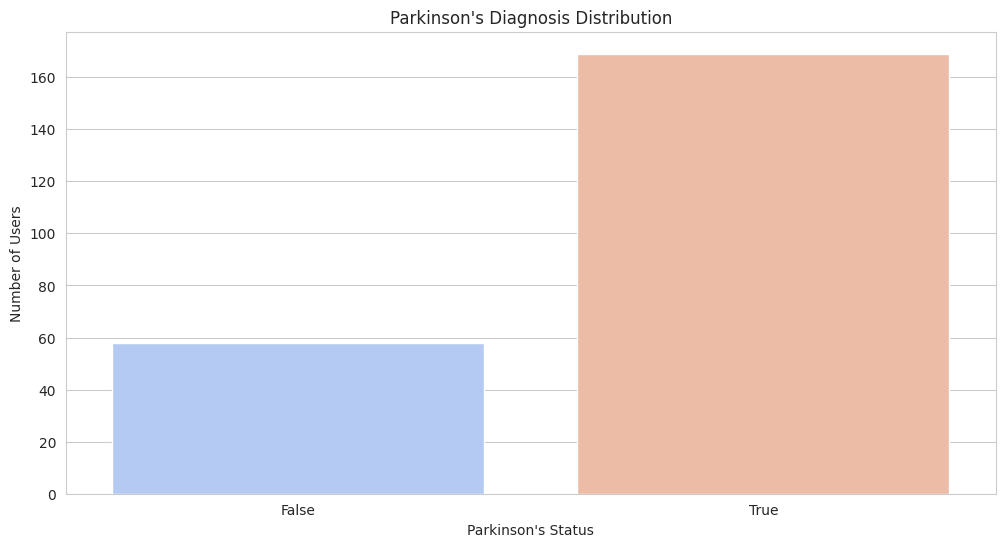

Parkinsons
True     169
False     58
Name: count, dtype: int64


In [ ]:
sns.countplot(x='Parkinsons', data=users_df, palette='coolwarm')
plt.title("Parkinson's Diagnosis Distribution")
plt.xlabel("Parkinson's Status")
plt.ylabel("Number of Users")
plt.show()

print(users_df['Parkinsons'].value_counts())


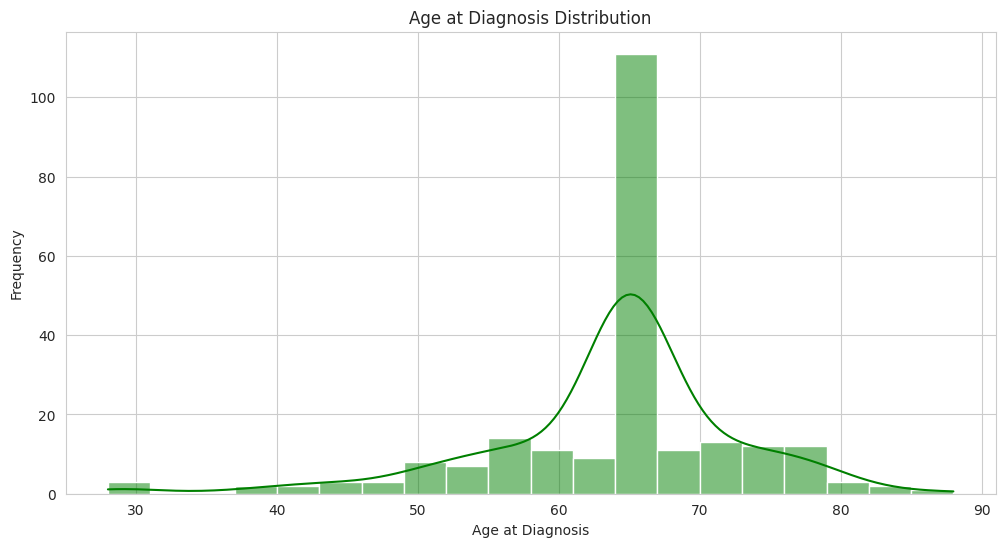

In [ ]:
sns.histplot(users_df['AgeAtDiagnosis'], bins=20, kde=True, color='green')
plt.title("Age at Diagnosis Distribution")
plt.xlabel("Age at Diagnosis")
plt.ylabel("Frequency")
plt.show()


/tmp/ipython-input-3097399156.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Impact', data=users_df,


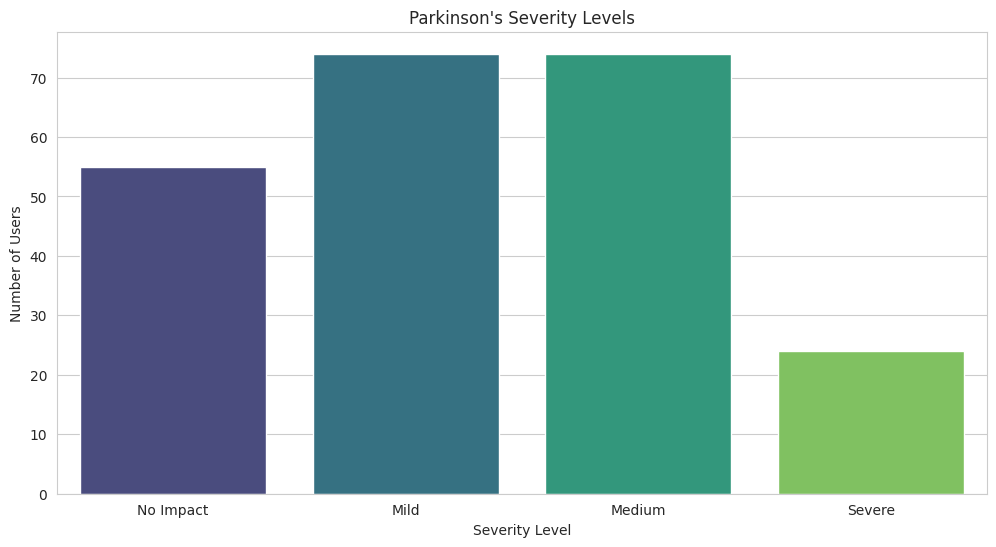

Impact
Mild         74
Medium       74
No Impact    55
Severe       24
Name: count, dtype: int64


In [ ]:
sns.countplot(x='Impact', data=users_df,
              order=['No Impact', 'Mild', 'Medium', 'Severe'],
              palette='viridis')
plt.title("Parkinson's Severity Levels")
plt.xlabel("Severity Level")
plt.ylabel("Number of Users")
plt.show()

print(users_df['Impact'].value_counts())

##Exploratory data analysis (KeyStrokes)

/tmp/ipython-input-4106439492.py:8: DtypeWarning: Columns (5,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  keystrokes_df = pd.read_csv(KEYSTROKES_PATH, usecols=["SourceFile", "UserKey", "Hand (L or R)", "Hold time", "Latency time", "Flight time"])


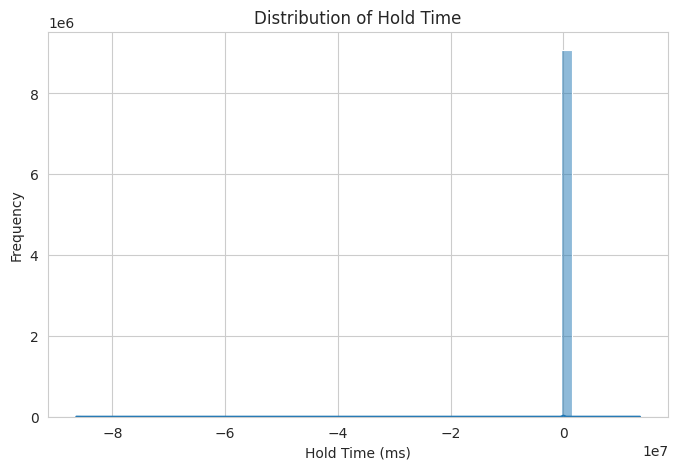

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


users_df = pd.read_csv(USER_DATA_PATH)

keystrokes_df = pd.read_csv(KEYSTROKES_PATH, usecols=["SourceFile", "UserKey", "Hand (L or R)", "Hold time", "Latency time", "Flight time"])




keystrokes_df['UserID'] = keystrokes_df['SourceFile'].apply(lambda x: x.split('_')[0])

merged_df = pd.merge(keystrokes_df, users_df[['UserID','Parkinsons']], on='UserID', how='left')


merged_df['Hold time'] = pd.to_numeric(merged_df['Hold time'], errors='coerce')


merged_df.dropna(subset=['Hold time'], inplace=True)


# Distribution of HoldTime
plt.figure(figsize=(8,5))
sns.histplot(merged_df['Hold time'], bins=50, kde=True)
plt.title("Distribution of Hold Time")
plt.xlabel("Hold Time (ms)")
plt.ylabel("Frequency")
plt.show()









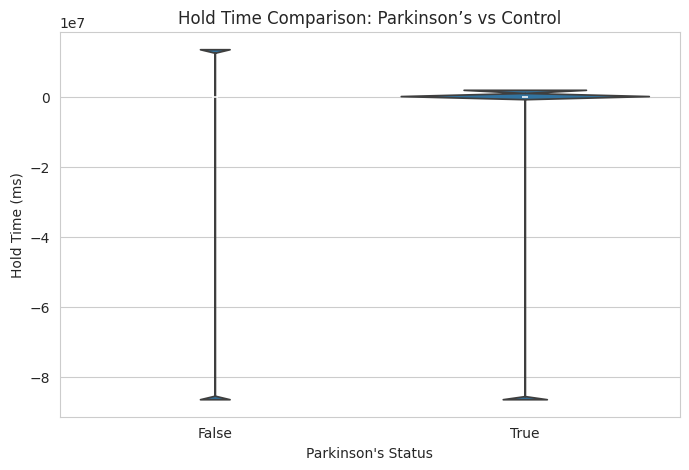

In [ ]:
# Compare HoldTime by Parkinson's
plt.figure(figsize=(8,5))
sns.violinplot(data=merged_df, x='Parkinsons', y='Hold time')
plt.title("Hold Time Comparison: Parkinson’s vs Control")
plt.xlabel("Parkinson's Status")
plt.ylabel("Hold Time (ms)")
plt.show()

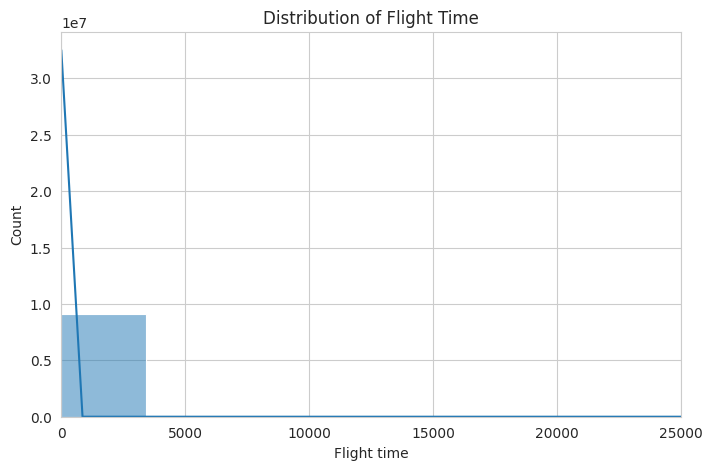

In [ ]:
plt.figure(figsize=(8,5))

# Ensure numeric
keystrokes_df['Flight time'] = pd.to_numeric(keystrokes_df['Flight time'], errors='coerce')


sns.histplot(keystrokes_df['Flight time'], bins=50, kde=True)

plt.xlim(0, 25000)
plt.title("Distribution of Flight Time")
plt.xlabel("Flight time")
plt.ylabel("Count")
plt.show()






In [ ]:
# Ensure time columns are numeric before aggregation
keystrokes_df['Hold time'] = pd.to_numeric(keystrokes_df['Hold time'], errors='coerce')
keystrokes_df['Flight time'] = pd.to_numeric(keystrokes_df['Flight time'], errors='coerce')
keystrokes_df['Latency time'] = pd.to_numeric(keystrokes_df['Latency time'], errors='coerce')


keystroke_features = keystrokes_df.groupby('UserKey').agg({
    'Hold time': ['mean','std','median'],
    'Flight time': ['mean','std','median'],
    'Latency time': ['mean','std','median']
}).reset_index()

# Flatten columns
keystroke_features.columns = ['UserKey'] + ['_'.join(col) for col in keystroke_features.columns[1:]]

In [ ]:
final_df = users_df.merge(
      keystroke_features,
      left_on="UserID",   # check: in your user dataset it might be UserID
      right_on="UserKey",
      how="inner"
 )

print("Final dataset shape:", final_df.shape)
final_df.head()



Final dataset shape: (217, 22)


,UserID,Gender,Parkinsons,Tremors,Sided,UPDRS,Impact,Levadopa,DA,MAOB,...,UserKey,Hold time_mean,Hold time_std,Hold time_median,Flight time_mean,Flight time_std,Flight time_median,Latency time_mean,Latency time_std,Latency time_median
0,0EA27ICBLF,Female,True,True,Left,Unknown,Severe,True,True,False,...,0EA27ICBLF,87.087552,25.204721,82.0,206.885676,580.707417,183.6,298.260523,1400.692805,269.5
1,0QAZFRHQHW,Female,False,False,Right,Unknown,No Impact,False,False,False,...,0QAZFRHQHW,102.873688,31.846867,101.6,304.996177,168.071732,289.1,405.924138,172.296022,390.6
2,1HOEBIGASW,Male,False,False,Right,Unknown,No Impact,False,False,False,...,1HOEBIGASW,65.568254,11.910890,62.5,396.244444,199.148889,421.9,463.917460,199.080825,488.3
3,1XNJCXS3EY,Male,False,False,Right,Unknown,No Impact,False,False,False,...,1XNJCXS3EY,123.793469,47.127055,112.3,208.651721,90.130824,207.0,325.569638,94.386097,328.1
4,2JTCBKUP8T,Male,True,True,Right,Unknown,Medium,True,False,False,...,2JTCBKUP8T,96.328869,32.050247,93.8,304.587446,158.244680,296.9,329.247732,165.593413,328.1


In [ ]:
import os

# Save final merged dataset
output_path = "/content/drive/MyDrive/Colab Notebooks/pd_project/data/processed/combined_dataset.csv"

# Create the directory if it doesn't exist
output_dir = os.path.dirname(output_path)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

final_df.to_csv(output_path, index=False)

print(f"Final dataset saved at: {output_path}")
print("Shape:", final_df.shape)

Final dataset saved at: /content/drive/MyDrive/Colab Notebooks/pd_project/data/processed/combined_dataset.csv
Shape: (217, 22)


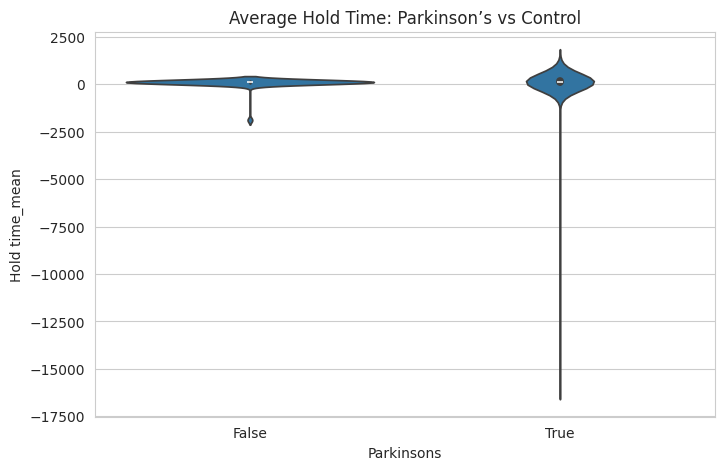

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(data=final_df, x='Parkinsons', y='Hold time_mean')
plt.title("Average Hold Time: Parkinson’s vs Control")
plt.show()


##ML Models

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/pd_project/data/processed/combined_dataset.csv")

In [ ]:
df.head()

,UserID,Gender,Parkinsons,Tremors,Sided,UPDRS,Impact,Levadopa,DA,MAOB,...,UserKey,Hold time_mean,Hold time_std,Hold time_median,Flight time_mean,Flight time_std,Flight time_median,Latency time_mean,Latency time_std,Latency time_median
0,0EA27ICBLF,Female,True,True,Left,Unknown,Severe,True,True,False,...,0EA27ICBLF,87.087552,25.204721,82.0,206.885676,580.707417,183.6,298.260523,1400.692805,269.5
1,0QAZFRHQHW,Female,False,False,Right,Unknown,No Impact,False,False,False,...,0QAZFRHQHW,102.873688,31.846867,101.6,304.996177,168.071732,289.1,405.924138,172.296022,390.6
2,1HOEBIGASW,Male,False,False,Right,Unknown,No Impact,False,False,False,...,1HOEBIGASW,65.568254,11.910890,62.5,396.244444,199.148889,421.9,463.917460,199.080825,488.3
3,1XNJCXS3EY,Male,False,False,Right,Unknown,No Impact,False,False,False,...,1XNJCXS3EY,123.793469,47.127055,112.3,208.651721,90.130824,207.0,325.569638,94.386097,328.1
4,2JTCBKUP8T,Male,True,True,Right,Unknown,Medium,True,False,False,...,2JTCBKUP8T,96.328869,32.050247,93.8,304.587446,158.244680,296.9,329.247732,165.593413,328.1


In [ ]:
df['Parkinsons'] = df['Parkinsons'].astype(str).str.strip().str.lower().map({
      'true': 1, 'false': 0, 'yes': 1, 'no': 0, '1': 1, '0': 0
 })
 # Drop rows with missing target
df = df.dropna(subset=['Parkinsons'])
df['Parkinsons'] = df['Parkinsons'].astype(int)

# Do the same for Tremors
df['Tremors'] = df['Tremors'].astype(str).str.strip().str.lower().map({
          'true': 1, 'false': 0, 'yes': 1, 'no': 0, '1': 1, '0': 0
})



In [ ]:
df.head()

,UserID,Gender,Parkinsons,Tremors,Sided,UPDRS,Impact,Levadopa,DA,MAOB,...,UserKey,Hold time_mean,Hold time_std,Hold time_median,Flight time_mean,Flight time_std,Flight time_median,Latency time_mean,Latency time_std,Latency time_median
0,0EA27ICBLF,Female,1,1,Left,4,Severe,1,1,0,...,0EA27ICBLF,87.087552,25.204721,82.0,206.885676,580.707417,183.6,298.260523,1400.692805,269.5
1,0QAZFRHQHW,Female,0,0,Right,4,No Impact,0,0,0,...,0QAZFRHQHW,102.873688,31.846867,101.6,304.996177,168.071732,289.1,405.924138,172.296022,390.6
2,1HOEBIGASW,Male,0,0,Right,4,No Impact,0,0,0,...,1HOEBIGASW,65.568254,11.910890,62.5,396.244444,199.148889,421.9,463.917460,199.080825,488.3
3,1XNJCXS3EY,Male,0,0,Right,4,No Impact,0,0,0,...,1XNJCXS3EY,123.793469,47.127055,112.3,208.651721,90.130824,207.0,325.569638,94.386097,328.1
4,2JTCBKUP8T,Male,1,1,Right,4,Medium,1,0,0,...,2JTCBKUP8T,96.328869,32.050247,93.8,304.587446,158.244680,296.9,329.247732,165.593413,328.1


In [ ]:
# Encode UPDRS if it's not numeric
if df['UPDRS'].dtype == 'object':
    le = LabelEncoder()
    df['UPDRS'] = le.fit_transform(df['UPDRS'].astype(str))

# One-hot encode Gender, Impact, Sided
df = pd.get_dummies(df, columns=['Gender','Impact','Sided'], drop_first=True)


In [ ]:
# Select only the biologically relevant + keystroke features
selected_features = [
    'AgeAtDiagnosis', 'UPDRS',
    'Hold time_mean','Hold time_std','Hold time_median',
    'Flight time_mean','Flight time_std','Flight time_median',
    'Latency time_mean','Latency time_std','Latency time_median'
]

X = df[selected_features]
y = df['Parkinsons']

                # Handle missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=selected_features)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=42, stratify=y
)



In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

models = {
      "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
      "SVM": SVC(probability=True, random_state=42),
      "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),

     # Bagging models
     "Bagging (Decision Tree)": BaggingClassifier(
                                  estimator=DecisionTreeClassifier(max_depth=5, random_state=42),
                                  n_estimators=100, max_samples=0.8, max_features=0.8, random_state=42
      ),
     "Bagging (LogReg)": BaggingClassifier(
                            estimator=LogisticRegression(max_iter=1000, random_state=42),
                            n_estimators=50, max_samples=0.8, max_features=1.0, random_state=42
      ),
     "Bagging (SVM)": BaggingClassifier(
                            estimator=SVC(probability=True, random_state=42),
                            n_estimators=30, max_samples=0.8, max_features=1.0, random_state=42
     )
}

In [ ]:
results = {}

for name, model in models.items():
    print("="*60)
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    results[name] = {
         "Accuracy": accuracy_score(y_test, y_pred),
         "Precision": precision_score(y_test, y_pred),
         "Recall": recall_score(y_test, y_pred),
         "F1-score": f1_score(y_test, y_pred),
         "ROC-AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else None
     }





Training Logistic Regression...
Training SVM...
Training Random Forest...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Bagging (Decision Tree)...
Training Bagging (LogReg)...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training Bagging (SVM)...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


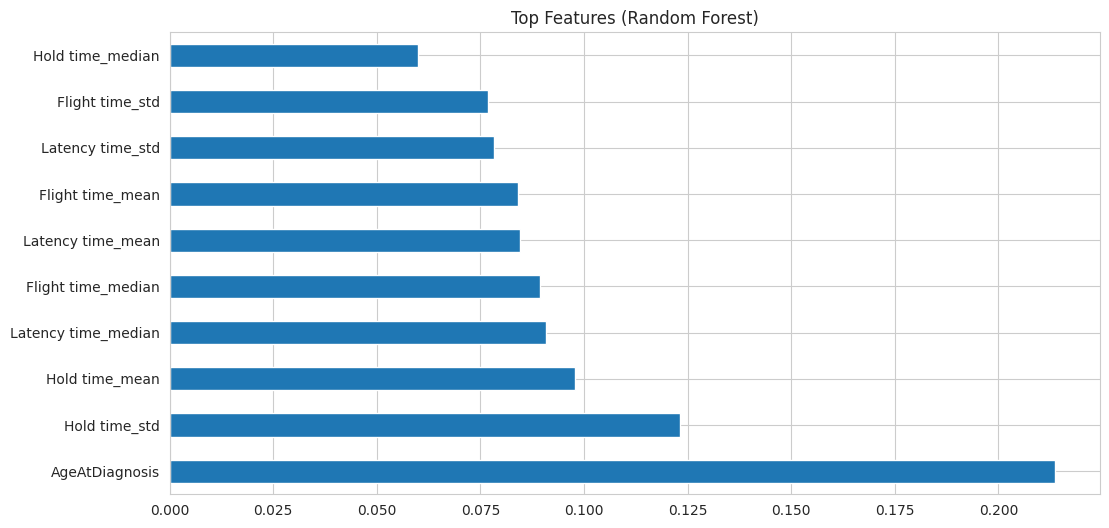

In [ ]:
import matplotlib.pyplot as plt

importances = rf.fit(X_train, y_train).feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

feat_importances.head(10).plot(kind='barh')
plt.title("Top Features (Random Forest)")
plt.show()


In [ ]:
results_df = pd.DataFrame(results)
print("\nSummary of Baseline Models:")
display(results_df)


Summary of Baseline Models:


,Accuracy,Precision,Recall,F1-score,ROC-AUC
Logistic Regression,0.681818,0.731707,0.909091,0.810811,0.506887
SVM,0.750000,0.750000,1.000000,0.857143,0.584022
Random Forest,0.795455,0.833333,0.909091,0.869565,0.878788
Bagging (Decision Tree),0.840909,0.882353,0.909091,0.895522,0.876033
Bagging (LogReg),0.681818,0.731707,0.909091,0.810811,0.539945
Bagging (SVM),0.750000,0.750000,1.000000,0.857143,0.479339


from matplotlib import pyplot as plt
results_df['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['F1-score'].plot(kind='hist', bins=20, title='F1-score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Accuracy', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Recall', y='F1-score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='F1-score', y='ROC-AUC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['F1-score'].plot(kind='line', figsize=(8, 4), title='F1-score')
plt.gca().spines[['top', 'right']].set_visible(False)

##GRU

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers

In [ ]:
X_sequences = np.load("/content/drive/MyDrive/Colab Notebooks/pd_project/data/X_sequences.npy")
y_labels    = np.load("/content/drive/MyDrive/Colab Notebooks/pd_project/data/y_labels.npy")
user_keys   = np.load("/content/drive/MyDrive/Colab Notebooks/pd_project/data/user_keys.npy")

print("Loaded shapes:", X_sequences.shape, y_labels.shape, user_keys.shape)

Loaded shapes: (17727, 500, 3) (17727,) (17727,)


In [ ]:
USER_DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/pd_project/data/processed/combined_dataset.csv"
users_df = pd.read_csv(USER_DATA_PATH, usecols=["UserKey","Parkinsons"])
unique_users = users_df.drop_duplicates("UserKey")


In [ ]:
unique_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Parkinsons  217 non-null    bool  
 1   UserKey     217 non-null    object
dtypes: bool(1), object(1)
memory usage: 2.0+ KB


In [ ]:
train_users, temp_users = train_test_split(
    unique_users, test_size=0.3, stratify=unique_users["Parkinsons"], random_state=42
)
val_users, test_users = train_test_split(
    temp_users, test_size=0.5, stratify=temp_users["Parkinsons"], random_state=42
)

def get_indices(userkeys):
    return [i for i, uid in enumerate(user_keys) if uid in set(userkeys)]

train_idx = get_indices(train_users["UserKey"])
val_idx   = get_indices(val_users["UserKey"])
test_idx  = get_indices(test_users["UserKey"])

X_train, y_train = X_sequences[train_idx], y_labels[train_idx]
X_val, y_val     = X_sequences[val_idx],   y_labels[val_idx]
X_test, y_test   = X_sequences[test_idx],  y_labels[test_idx]

y_train_cat = to_categorical(y_train, num_classes=2)
y_val_cat   = to_categorical(y_val,   num_classes=2)
y_test_cat  = to_categorical(y_test,  num_classes=2)

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)

Train: (11988, 500, 3) Val: (3234, 500, 3) Test: (2505, 500, 3)


In [ ]:
cw = class_weight.compute_class_weight(
      "balanced", classes=np.unique(y_train), y=y_train
      )
class_weight_dict = dict(enumerate(cw))
print("Class Weights:", class_weight_dict)

Class Weights: {0: np.float64(1.8974358974358974), 1: np.float64(0.6788990825688074)}


In [ ]:
SEQ_LEN = X_sequences.shape[1]
NUM_FEATS = X_sequences.shape[2]

gru_model = Sequential([
    GRU(32, return_sequences=True, input_shape=(SEQ_LEN, NUM_FEATS), kernel_regularizer=regularizers.l2(1e-4)),
    Dropout(0.4),
    GRU(16, kernel_regularizer=regularizers.l2(1e-4)),
    Dropout(0.4),
    Dense(16, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),
    Dense(2, activation="softmax")
])

gru_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
gru_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                     │ (None, 500, 32)        │         3,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 500, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 16)             │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,258 (24.45 KB)

 Trainable params: 6,258 (24.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3)

history = gru_model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=50,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[early, reduce_lr],
    verbose=1
)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7967 - loss: 0.4243 - val_accuracy: 0.7183 - val_loss: 0.5414 - learning_rate: 2.5000e-04
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.7884 - loss: 0.4216 - val_accuracy: 0.7090 - val_loss: 0.5535 - learning_rate: 2.5000e-04
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.7823 - loss: 0.4286 - val_accuracy: 0.7223 - val_loss: 0.5318 - learning_rate: 2.5000e-04
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7855 - loss: 0.4222 - val_accuracy: 0.7251 - val_loss: 0.5498 - learning_rate: 2.5000e-04
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7878 - loss: 0.4249 - val_accuracy: 0.7025 - val_loss: 0.6046 - learning_rate: 2.5000e-04
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.7949 - loss: 0.4142 - val_accuracy: 0.7124 - val_loss: 0.6272 - learning_rate: 2.5000e-04
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/ste

102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6935 - loss: 0.6420
Validation Accuracy (per window): 0.72


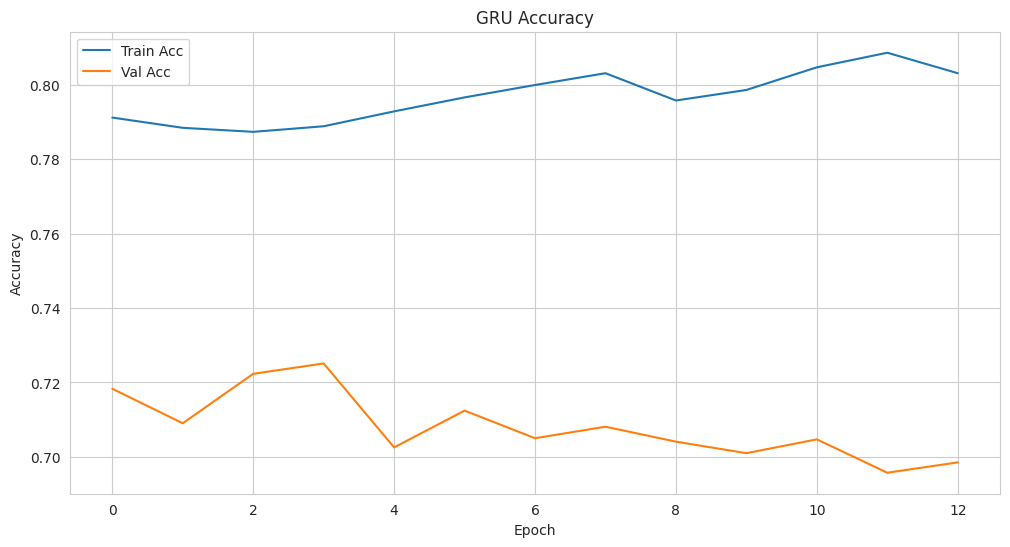

In [ ]:
val_loss, val_acc = gru_model.evaluate(X_val, y_val_cat)
print(f"Validation Accuracy (per window): {val_acc:.2f}")

# Plot learning curve
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("GRU Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Get predictions for validation set
y_val_proba = gru_model.predict(X_val)
val_results = pd.DataFrame({
    "UserKey": user_keys[val_idx],
    "TrueLabel": y_val,
    "PredProb": y_val_proba[:,1]
})

# Aggregate per user
user_preds = val_results.groupby("UserKey").agg({
    "TrueLabel": "first",
    "PredProb": "mean"
})
user_preds["PredLabel"] = (user_preds["PredProb"] >= 0.5).astype(int)

print("User-level Accuracy:", accuracy_score(user_preds["TrueLabel"], user_preds["PredLabel"]))
print("User-level ROC-AUC:", roc_auc_score(user_preds["TrueLabel"], user_preds["PredProb"]))

102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
User-level Accuracy: 0.5454545454545454
User-level ROC-AUC: 0.465


## Hybrid LSTM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
X_sequences = np.load("/content/drive/MyDrive/Colab Notebooks/pd_project/data/X_sequences.npy")
y_labels    = np.load("/content/drive/MyDrive/Colab Notebooks/pd_project/data/y_labels.npy")
user_keys   = np.load("/content/drive/MyDrive/Colab Notebooks/pd_project/data/user_keys.npy")

print("Loaded shapes:", X_sequences.shape, y_labels.shape, user_keys.shape)


Loaded shapes: (17727, 500, 3) (17727,) (17727,)


In [ ]:
USER_DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/pd_project/data/processed/combined_dataset.csv"
users_df = pd.read_csv(USER_DATA_PATH, usecols=["UserKey","Parkinsons"])
unique_users = users_df.drop_duplicates("UserKey")
unique_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Parkinsons  217 non-null    bool  
 1   UserKey     217 non-null    object
dtypes: bool(1), object(1)
memory usage: 2.0+ KB


In [ ]:
train_users, temp_users = train_test_split(
    unique_users, test_size=0.3, stratify=unique_users["Parkinsons"], random_state=42
)
val_users, test_users = train_test_split(
    temp_users, test_size=0.5, stratify=temp_users["Parkinsons"], random_state=42
)

def get_indices(userkeys):
    return [i for i, uid in enumerate(user_keys) if uid in set(userkeys)]

train_idx = get_indices(train_users["UserKey"])
val_idx   = get_indices(val_users["UserKey"])
test_idx  = get_indices(test_users["UserKey"])

X_train, y_train = X_sequences[train_idx], y_labels[train_idx]
X_val, y_val     = X_sequences[val_idx],   y_labels[val_idx]
X_test, y_test   = X_sequences[test_idx],  y_labels[test_idx]

y_train_cat = to_categorical(y_train, num_classes=2)
y_val_cat   = to_categorical(y_val,   num_classes=2)
y_test_cat  = to_categorical(y_test,  num_classes=2)

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)

Train: (11988, 500, 3) Val: (3234, 500, 3) Test: (2505, 500, 3)


In [ ]:
cw = class_weight.compute_class_weight(
      "balanced", classes=np.unique(y_train), y=y_train
      )
class_weight_dict = dict(enumerate(cw))
print("Class Weights:", class_weight_dict)


Class Weights: {0: np.float64(1.8974358974358974), 1: np.float64(0.6788990825688074)}


In [ ]:
SEQ_LEN = X_sequences.shape[1]
NUM_FEATS = X_sequences.shape[2]

cnn_lstm_model = Sequential([
    Conv1D(filters=64, kernel_size=5, activation="relu", input_shape=(SEQ_LEN, NUM_FEATS)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=5, activation="relu"),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    LSTM(64),
    Dropout(0.4),

    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(2, activation="softmax")
])

cnn_lstm_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
cnn_lstm_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 496, 64)        │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 248, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 248, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 244, 128)       │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 122, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 122, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,810 (374.26 KB)

 Trainable params: 95,810 (374.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3)

history = cnn_lstm_model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=25,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[early, reduce_lr],
    verbose=1
)

Epoch 1/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5696 - loss: 0.6621 - val_accuracy: 0.6469 - val_loss: 0.6745 - learning_rate: 0.0010
Epoch 2/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7968 - loss: 0.4725 - val_accuracy: 0.6954 - val_loss: 0.6337 - learning_rate: 0.0010
Epoch 3/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8013 - loss: 0.3985 - val_accuracy: 0.8290 - val_loss: 0.4614 - learning_rate: 0.0010
Epoch 4/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8201 - loss: 0.3926 - val_accuracy: 0.7260 - val_loss: 0.5234 - learning_rate: 0.0010
Epoch 5/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8376 - loss: 0.3692 - val_accuracy: 0.7149 - val_loss: 0.5909 - learning_rate: 0.0010
Epoch 6/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8290 - loss: 0.3441 - val_accuracy: 0.7260 - val_loss: 0.6186 - learning_rate: 0.0010
Epoch 7/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8541 - loss: 0

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7548 - loss: 0.6541
Validation Accuracy (per window): 0.83


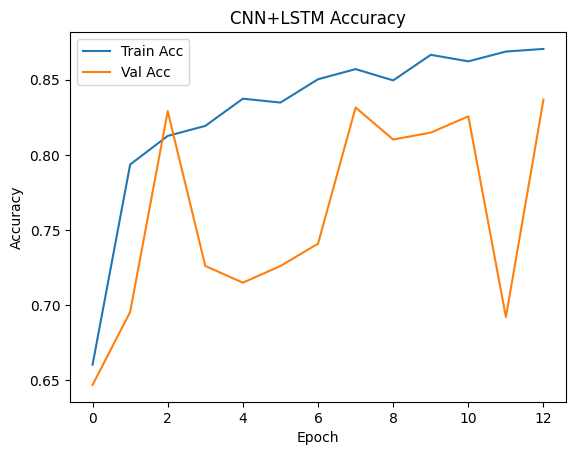

In [ ]:
val_loss, val_acc = cnn_lstm_model.evaluate(X_val, y_val_cat)
print(f"Validation Accuracy (per window): {val_acc:.2f}")

plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("CNN+LSTM Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
# Save
cnn_lstm_model.save("/content/drive/MyDrive/Colab Notebooks/pd_project/models/cnn_lstm_model.h5")
print("Model saved!")






Model saved!


In [ ]:




# Load later
from tensorflow.keras.models import load_model
model2 = load_model("/content/drive/MyDrive/Colab Notebooks/pd_project/models/cnn_lstm_model.h5")


In [ ]:
y_test_proba = model2.predict(X_test)
y_test_pred = np.argmax(y_test_proba, axis=1)

print("Per-window Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Per-window Test Accuracy: 0.8526946107784431
              precision    recall  f1-score   support

           0       0.44      0.97      0.60       288
           1       1.00      0.84      0.91      2217

    accuracy                           0.85      2505
   macro avg       0.72      0.90      0.76      2505
weighted avg       0.93      0.85      0.87      2505



In [ ]:
test_results = pd.DataFrame({
      "UserKey": user_keys[test_idx],
          "TrueLabel": y_test,
              "PredProb": y_test_proba[:,1]
              })

# Group by user → take mean probability
user_preds = test_results.groupby("UserKey").agg({
    "TrueLabel": "first",
    "PredProb": "mean"
})
user_preds["PredLabel"] = (user_preds["PredProb"] >= 0.5).astype(int)

In [ ]:
print("User-level Accuracy:", accuracy_score(user_preds["TrueLabel"], user_preds["PredLabel"]))
print("User-level ROC-AUC:", roc_auc_score(user_preds["TrueLabel"], user_preds["PredProb"]))
print("User-level Report:\n", classification_report(user_preds["TrueLabel"], user_preds["PredLabel"]))
print("Confusion Matrix:\n", confusion_matrix(user_preds["TrueLabel"], user_preds["PredLabel"]))

User-level Accuracy: 0.6060606060606061
User-level ROC-AUC: 0.7314814814814815
User-level Report:
               precision    recall  f1-score   support

           0       0.40      0.89      0.55         9
           1       0.92      0.50      0.65        24

    accuracy                           0.61        33
   macro avg       0.66      0.69      0.60        33
weighted avg       0.78      0.61      0.62        33

Confusion Matrix:
 [[ 8  1]
 [12 12]]


##InceptionTime

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
import matplotlib.pyplot as plt

In [ ]:
X = np.load("/content/drive/MyDrive/Colab Notebooks/pd_project/data/X_sequences.npy")
y = np.load("/content/drive/MyDrive/Colab Notebooks/pd_project/data/y_labels.npy")

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (17727, 500, 3)
y shape: (17727,)


In [ ]:
n_samples, seq_len, n_features = X.shape
X_flat = X.reshape(-1, n_features)

scaler = StandardScaler().fit(X_flat)
X_scaled = scaler.transform(X_flat).reshape(n_samples, seq_len, n_features)

# One-hot encode labels if not already
y = tf.keras.utils.to_categorical(y, num_classes=2)

In [ ]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(
      X_scaled, y, test_size=0.2, random_state=42, stratify=y
      )

# Split the temporary training set into actual training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
      X_train_temp, y_train_temp, test_size=0.125, random_state=42, stratify=y_train_temp
)

print("Train:", X_train.shape)
print("Val:", X_val.shape)
print("Test:", X_test.shape)

Train: (12408, 500, 3)
Val: (1773, 500, 3)
Test: (3546, 500, 3)


In [ ]:
cw = class_weight.compute_class_weight(
      "balanced", classes=np.unique(np.argmax(y_train, axis=1)), y=np.argmax(y_train, axis=1)
      )
class_weights = dict(enumerate(cw))
print("Class Weights:", class_weights)



Class Weights: {0: np.float64(1.820956853536836), 1: np.float64(0.6892567492500833)}


In [ ]:
def inception_module(input_tensor, stride=1, nb_filters=32, kernel_sizes=[10, 20, 40]):
    conv_list = []
    for k in kernel_sizes:
        conv = layers.Conv1D(filters=nb_filters, kernel_size=k, strides=stride,
                                       padding="same", activation="relu",
                                       kernel_regularizer=tf.keras.regularizers.l2(1e-4))(input_tensor)
        conv_list.append(conv)
    maxpool = layers.MaxPooling1D(pool_size=3, strides=stride, padding="same")(input_tensor)
    conv_maxpool = layers.Conv1D(filters=nb_filters, kernel_size=1,
                                   padding="same", activation="relu")(maxpool)
    conv_list.append(conv_maxpool)
    x = layers.Concatenate(axis=2)(conv_list)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    return x

In [ ]:
def residual_block(input_tensor, nb_filters=32):
      x = inception_module(input_tensor, nb_filters=nb_filters)
      x = inception_module(x, nb_filters=nb_filters)
      x = inception_module(x, nb_filters=nb_filters)
      shortcut = layers.Conv1D(nb_filters*4, kernel_size=1, padding="same")(input_tensor)
      x = layers.Add()([x, shortcut])
      x = layers.BatchNormalization()(x)
      x = layers.Activation("relu")(x)
      return x

In [ ]:
def build_inception_time(input_shape, n_classes=2, nb_filters=32, depth=3):
    input_layer = layers.Input(shape=input_shape)
    x = input_layer
    for _ in range(depth):
        x = residual_block(x, nb_filters=nb_filters)
    gap = layers.GlobalAveragePooling1D()(x)
    output_layer = layers.Dense(n_classes, activation="softmax")(gap)
    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model

inception_time_model = build_inception_time(input_shape=(seq_len, n_features), n_classes=2)

inception_time_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

inception_time_model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 500, 3)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_69    │ (None, 500, 3)    │          0 │ input_layer_7[0]… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_306 (Conv1D) │ (None, 500, 32)   │        992 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_307 (Conv1D) │ (None, 500, 32)   │      1,952 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_308 (Conv1D) │ (None, 500, 32)   │      3,872 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_309 (Conv1D) │ (None, 500, 32)   │        128 │ max_pooling1d_69… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_69      │ (None, 500, 128)  │          0 │ conv1d_306[0][0], │
│ (Concatenate)       │                   │            │ conv1d_307[0][0], │
│                     │                   │            │ conv1d_308[0][0], │
│                     │                   │            │ conv1d_309[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 500, 128)  │        512 │ concatenate_69[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 500, 128)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_70    │ (None, 500, 128)  │          0 │ activation_98[0]… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_310 (Conv1D) │ (None, 500, 32)   │     40,992 │ activation_98[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_311 (Conv1D) │ (None, 500, 32)   │     81,952 │ activation_98[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_312 (Conv1D) │ (None, 500, 32)   │    163,872 │ activation_98[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_313 (Conv1D) │ (None, 500, 32)   │      4,128 │ max_pooling1d_70… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_70      │ (None, 500, 128)  │          0 │ conv1d_310[0][0], │
│ (Concatenate)       │                   │            │ conv1d_311[0][0], │
│                     │                   │            │ conv1d_312[0][0], │
│                     │                   │            │ conv1d_313[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 500, 128)  │        512 │ concatenate_70[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_99       │ (None, 500, 128)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_71    │ (None, 500, 128)  │          0 │ activation_99[0]… │
│ (MaxPooling1D)      │                   │            │                 

 Total params: 2,374,434 (9.06 MB)

 Trainable params: 2,371,362 (9.05 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [ ]:
callbacks = [
      tf.keras.callbacks.EarlyStopping(
              monitor='val_loss', patience=15, restore_best_weights=True
                  ),
      tf.keras.callbacks.ReduceLROnPlateau(
              monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6
      )
     ]



In [ ]:
history = inception_time_model.fit(
      X_train, y_train,
      validation_data=(X_val, y_val),

      epochs=100,
      batch_size=64,
      class_weight=class_weights,
      callbacks=callbacks,
      verbose=1
)







Epoch 1/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 30s 154ms/step - accuracy: 0.8866 - loss: 0.3371 - val_accuracy: 0.7434 - val_loss: 0.7545 - learning_rate: 0.0010
Epoch 2/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 28s 146ms/step - accuracy: 0.8896 - loss: 0.3245 - val_accuracy: 0.8517 - val_loss: 0.4557 - learning_rate: 0.0010
Epoch 3/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 28s 146ms/step - accuracy: 0.9038 - loss: 0.2921 - val_accuracy: 0.8015 - val_loss: 0.6922 - learning_rate: 0.0010
Epoch 4/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 28s 146ms/step - accuracy: 0.9174 - loss: 0.2610 - val_accuracy: 0.7812 - val_loss: 0.8201 - learning_rate: 0.0010
Epoch 5/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 28s 146ms/step - accuracy: 0.9120 - loss: 0.2678 - val_accuracy: 0.7817 - val_loss: 0.8522 - learning_rate: 0.0010
Epoch 6/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 28s 146ms/step - accuracy: 0.9157 - loss: 0.2596 - val_accuracy: 0.7513 - val_loss: 0.8197 - learning_rate: 0.0010
Epoch 7/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 28s 146ms/step - accura

In [ ]:
best_epoch = np.argmax(history.history['val_accuracy'])
best_val_acc = history.history['val_accuracy'][best_epoch]
print(f"Best validation accuracy: {best_val_acc:.4f} at epoch {best_epoch+1}")

Best validation accuracy: 0.8517 at epoch 2


Test Accuracy: 0.8536


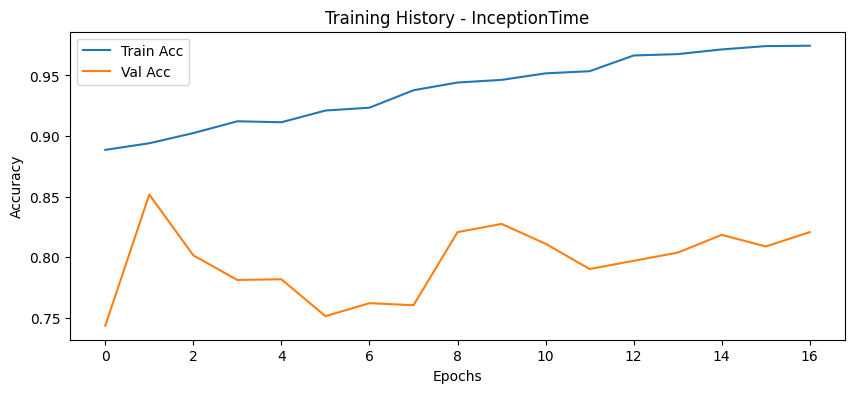

In [ ]:
test_loss, test_acc = inception_time_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Training History - InceptionTime")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
inception_time_model.save("/content/drive/MyDrive/Colab Notebooks/pd_project/models/inception_time_model.h5")
print("model saved! ")

model saved! 


##Inception time with GAN Data









In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the balanced dataset
X = np.load("/content/drive/MyDrive/Colab Notebooks/pd_project/data/processed/X_aug.npy")
y = np.load("/content/drive/MyDrive/Colab Notebooks/pd_project/data/processed/y_aug.npy")

print("Loaded data shapes:", X.shape, y.shape)


Loaded data shapes: (25718, 500, 3) (25718,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)


Train: (18002, 500, 3) Val: (3858, 500, 3) Test: (3858, 500, 3)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

def inception_module(input_tensor, nb_filters=32, kernel_sizes=[10, 20, 40], bottleneck_size=32):
    # Bottleneck layer (1x1 convolution)
    if bottleneck_size > 0:
        x = layers.Conv1D(bottleneck_size, 1, padding='same', activation='relu')(input_tensor)
    else:
        x = input_tensor

    # Parallel convolutions
    conv_list = []
    for ks in kernel_sizes:
        conv_list.append(layers.Conv1D(nb_filters, ks, padding='same', activation='relu')(x))

    # Max pooling branch
    pool = layers.MaxPooling1D(pool_size=3, strides=1, padding='same')(input_tensor)
    pool_conv = layers.Conv1D(nb_filters, 1, padding='same', activation='relu')(pool)

    # Concatenate all branches
    x = layers.Concatenate(axis=2)(conv_list + [pool_conv])
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    return x

In [ ]:
def build_inception_time(input_shape, nb_classes=1):
    input_layer = layers.Input(shape=input_shape)

    # Stack of Inception modules
    x = inception_module(input_layer, nb_filters=32)
    x = inception_module(x, nb_filters=32)
    x = inception_module(x, nb_filters=32)

    # Global Average Pooling
    gap = layers.GlobalAveragePooling1D()(x)

    # Output layer
    output_layer = layers.Dense(nb_classes, activation='sigmoid')(gap)

    model = models.Model(inputs=input_layer, outputs=output_layer)

    model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(1e-3),
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )
    return model

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2])
model = build_inception_time(input_shape)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[callback],
    verbose=1
)


Epoch 1/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 37s 68ms/step - accuracy: 0.8640 - auc: 0.9412 - loss: 0.2950 - val_accuracy: 0.8170 - val_auc: 0.8274 - val_loss: 0.4502
Epoch 2/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9169 - auc: 0.9771 - loss: 0.1924 - val_accuracy: 0.8520 - val_auc: 0.9412 - val_loss: 0.3626
Epoch 3/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9283 - auc: 0.9825 - loss: 0.1702 - val_accuracy: 0.8383 - val_auc: 0.8924 - val_loss: 0.4256
Epoch 4/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9391 - auc: 0.9862 - loss: 0.1498 - val_accuracy: 0.8331 - val_auc: 0.9075 - val_loss: 0.4632
Epoch 5/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9370 - auc: 0.9861 - loss: 0.1514 - val_accuracy: 0.9059 - val_auc: 0.9749 - val_loss: 0.2352
Epoch 6/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9431 - auc: 0.9880 - loss: 0.1383 - val_accuracy: 0.9186 - val_auc: 0.9592 - val_loss: 0.2953
Epoch 7/50
282/282 ━━━━━━━━━━━━━━

121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9552 - auc: 0.9878 - loss: 0.1419
Test Accuracy: 0.9489 | AUC: 0.9850
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95      1929
         1.0       0.94      0.96      0.95      1929

    accuracy                           0.95      3858
   macro avg       0.95      0.95      0.95      3858
weighted avg       0.95      0.95      0.95      3858



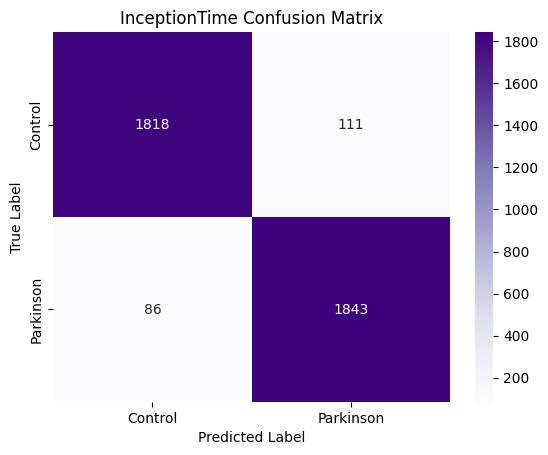

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate
test_loss, test_acc, test_auc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f} | AUC: {test_auc:.4f}")

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Control', 'Parkinson'], yticklabels=['Control', 'Parkinson'])
plt.title("InceptionTime Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:

model_save_path = "/content/drive/MyDrive/Colab Notebooks/pd_project/models/inception_time_v2_model.keras"

model.save(model_save_path)

print(f"InceptionTime model saved successfully at:\n{model_save_path}")



InceptionTime model saved successfully at:
/content/drive/MyDrive/Colab Notebooks/pd_project/models/inception_time_v2_model.keras


In [ ]:
from tensorflow.keras.models import load_model

# Load your saved InceptionTime model
model_path = "/content/drive/MyDrive/Colab Notebooks/pd_project/models/inception_time_v2_model.keras"
model = load_model(model_path)

print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
# Example using one real test sequence
sample_input = X_test[0:1]  # Shape: (1, 500, 3)
true_label = y_test[0]

# Predict
prediction = model.predict(sample_input)
probability = float(prediction[0][0])
predicted_label = "Parkinson's" if probability >= 0.5 else "Control"

print(f" True Label: {'Parkinson' if true_label==1 else 'Control'}")
print(f" Predicted Label: {predicted_label}")
print(f" Parkinson’s Probability: {probability:.4f}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
 True Label: Parkinson
 Predicted Label: Parkinson's
 Parkinson’s Probability: 0.8788


In [ ]:
predictions = (model.predict(X_test[:10]) > 0.5).astype(int)

for i, p in enumerate(predictions):
    print(f"Sample {i+1}: Predicted -> {'Parkinson' if p==1 else 'Control'}, True -> {'Parkinson' if y_test[i]==1 else 'Control'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Sample 1: Predicted -> Parkinson, True -> Parkinson
Sample 2: Predicted -> Control, True -> Control
Sample 3: Predicted -> Control, True -> Control
Sample 4: Predicted -> Parkinson, True -> Parkinson
Sample 5: Predicted -> Parkinson, True -> Parkinson
Sample 6: Predicted -> Parkinson, True -> Parkinson
Sample 7: Predicted -> Control, True -> Control
Sample 8: Predicted -> Control, True -> Control
Sample 9: Predicted -> Parkinson, True -> Parkinson
Sample 10: Predicted -> Parkinson, True -> Parkinson


In [ ]:
preds = model.predict(X_test)
print(np.mean(preds[y_test == 0]), np.mean(preds[y_test == 1]))


121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
0.08414813 0.88817525


In [ ]:
import numpy as np

# assuming model expects (None, 500, 3)
dummy_input = np.random.rand(1, 500, 3).astype("float32")
prediction = model.predict(dummy_input)

print("Prediction:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: [[0.06370267]]


In [ ]:
import numpy as np
random_input = np.random.normal(size=(1, 500, 3))
print(model.predict(random_input))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[1.]]


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib

# Load your augmented training sequences
X = np.load("/content/drive/MyDrive/Colab Notebooks/pd_project/data/processed/X_aug.npy")

print("Loaded data shape:", X.shape)  # should be (samples, 500, 3)
SEQ_LEN = X.shape[1]
NUM_FEATS = X.shape[2]

# Fit a new scaler on flattened data
scaler = StandardScaler()
scaler.fit(X.reshape(-1, NUM_FEATS))

# Save the scaler for inference and backend use
joblib.dump(scaler, "/content/drive/MyDrive/Colab Notebooks/pd_project/models/scaler.pkl")
print(" Scaler saved successfully at /content/drive/MyDrive/Colab Notebooks/pd_project/models/scaler.pkl")


Loaded data shape: (25718, 500, 3)
✅ Scaler saved successfully at /content/drive/MyDrive/Colab Notebooks/pd_project/models/scaler.pkl


In [ ]:
from tensorflow.keras.models import load_model

# Load your model
model = load_model("/content/drive/MyDrive/Colab Notebooks/pd_project/models/inception_time_v2_model.keras")

# Load the scaler you just saved
scaler = joblib.load("/content/drive/MyDrive/Colab Notebooks/pd_project/models/scaler.pkl")

# Create a realistic test input (like 500 keystrokes with 3 timing features)
dummy_keystrokes = np.random.uniform(low=50, high=200, size=(500, 3))

# Apply same scaling
scaled_input = scaler.transform(dummy_keystrokes).reshape(1, 500, 3)

# Predict
prediction = model.predict(scaled_input)
prob = float(prediction[0][0])
label = "Parkinson’s Detected" if prob >= 0.5 else "Healthy"

print(f"🧠 Prediction: {label} (prob={prob:.4f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
🧠 Prediction: Healthy (prob=0.0000)


In [ ]:
print("Mean:", scaler.mean_)
print("Std Dev:", scaler.scale_)


Mean: [0.12294305 0.08876616 0.09860875]
Std Dev: [0.84743581 0.83793    0.84036804]


In [ ]:
# ==============================================================
#  1. Imports
# ==============================================================
import numpy as np
import pandas as pd
import joblib
from tensorflow.keras.models import load_model

# ==============================================================
#  2. Paths (update these for your setup)
# ==============================================================
CSV_PATH = "/content/drive/MyDrive/Colab Notebooks/pd_project/data/healthy_user.csv"  # your CSV path
MODEL_PATH = "/content/drive/MyDrive/Colab Notebooks/pd_project/models/inception_time_v2_model.keras"
SCALER_PATH = "/content/drive/MyDrive/Colab Notebooks/pd_project/models/scaler.pkl"

SEQ_LEN = 500
FEATURES = ["holdTime", "flightTime", "latencyTime"]

# ==============================================================
#  3. Load model and scaler
# ==============================================================
print("📦 Loading model and scaler ...")
model = load_model(MODEL_PATH, compile=True)
scaler = joblib.load(SCALER_PATH)
print("✅ Model and scaler loaded successfully.")

# ==============================================================
#  4. Load and clean CSV keystroke data
# ==============================================================
df = pd.read_csv(CSV_PATH, on_bad_lines='skip')
print(f"Original shape: {df.shape}")
print("Columns:", df.columns.tolist())

# Select only necessary features
df = df[FEATURES].copy()

# Drop rows with NaN or invalid values
df = df.dropna().apply(pd.to_numeric, errors="coerce").dropna()
print(f"After cleaning: {df.shape}")

# ==============================================================
#  5. Auto-detect ms vs sec units
# ==============================================================
mean_val = df.mean().mean()
if mean_val > 5:  # likely milliseconds
    print("⚠ Detected millisecond data → converting to seconds.")
    df[FEATURES] = df[FEATURES] / 1000.0
else:
    print("✅ Data already in seconds.")

print("Feature means after normalization:\n", df.mean())

# ==============================================================
#  6. Prepare 500-length sequence
# ==============================================================
if len(df) >= SEQ_LEN:
    seq = df.tail(SEQ_LEN).values
else:
    pad_len = SEQ_LEN - len(df)
    pad = np.tile(df.mean().values, (pad_len, 1))
    seq = np.vstack([pad, df.values])

print(f"Final sequence shape: {seq.shape}")

# Scale using the training scaler
seq_scaled = scaler.transform(seq).reshape(1, SEQ_LEN, len(FEATURES))

# ==============================================================
#  7. Predict
# ==============================================================
print("🧠 Running model prediction ...")
prediction = model.predict(seq_scaled)
prob = float(prediction[0][0])

label = "Parkinson’s Detected" if prob >= 0.5 else "Healthy"
if prob >= 0.85:
    severity = "Severe"
elif prob >= 0.65:
    severity = "Moderate"
elif prob >= 0.5:
    severity = "Mild"
else:
    severity = "None"

# ==============================================================
#  8. Display result
# ==============================================================
print("\n===========================")
print("     📃 Prediction Report   ")
print("===========================")
print(f"Label: {label}")
print(f"Probability: {prob:.4f}")
print(f"Severity: {severity}")
print("===========================")

📦 Loading model and scaler ...
✅ Model and scaler loaded successfully.
Original shape: (1233, 8)
Columns: ['key', 'code', 'pressTs', 'releaseTs', 'holdTime', 'flightTime', 'latencyTime', 'isError']
After cleaning: (1233, 3)
⚠ Detected millisecond data → converting to seconds.
Feature means after normalization:
 holdTime       0.087292
flightTime     0.342298
latencyTime    0.254219
dtype: float64
Final sequence shape: (500, 3)
🧠 Running model prediction ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

     📃 Prediction Report   
Label: Parkinson’s Detected
Probability: 1.0000
Severity: Severe


In [ ]:
import numpy as np

for m in [0.01, 0.05, 0.1, 0.5, 1, 2]:
    t = np.ones((1, 500, 3)) * m
    print(f"Input mean {m} → Pred:", model.predict(t)[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Input mean 0.01 → Pred: 0.7220132
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Input mean 0.05 → Pred: 0.5513131
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Input mean 0.1 → Pred: 0.12062046
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Input mean 0.5 → Pred: 0.19365366
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Input mean 1 → Pred: 0.00010303725
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Input mean 2 → Pred: 4.394786e-08


In [ ]:
# ==============================================================
#  5. Normalize using training scaler properly
# ==============================================================

# Convert ms → seconds if avg > 1.0 (heuristic)
if df[FEATURES].mean().mean() > 1.0:
    print("⚠ Detected ms data → converting to seconds.")
    df[FEATURES] = df[FEATURES] / 1000.0
else:
    print("✅ Data already looks like seconds.")

# Align shape to expected sequence length (500)
if len(df) >= SEQ_LEN:
    seq = df.tail(SEQ_LEN).values
else:
    pad_len = SEQ_LEN - len(df)
    pad = np.tile(df.mean().values, (pad_len, 1))
    seq = np.vstack([pad, df.values])

# Scale with the same training scaler
seq_scaled = scaler.transform(seq).reshape(1, SEQ_LEN, len(FEATURES))

✅ Data already looks like seconds.


In [ ]:
# ==============================================================
# 1. Imports
# ==============================================================
import numpy as np
import pandas as pd
import joblib
from tensorflow.keras.models import load_model

# ==============================================================
# 2. Paths (update according to your Drive)
# ==============================================================
CSV_PATH = "/content/drive/MyDrive/Colab Notebooks/pd_project/data/healthy_user.csv"  # your file
MODEL_PATH = "/content/drive/MyDrive/Colab Notebooks/pd_project/models/inception_time_v2_model.keras"
SCALER_PATH = "/content/drive/MyDrive/Colab Notebooks/pd_project/models/scaler.pkl"

SEQ_LEN = 500
FEATURES = ["holdTime", "flightTime", "latencyTime"]

# ==============================================================
# 3. Load model & scaler
# ==============================================================
print("📦 Loading model and scaler ...")
model = load_model(MODEL_PATH, compile=True)
scaler = joblib.load(SCALER_PATH)
print("✅ Model and scaler loaded successfully.")

# ==============================================================
# 4. Load and inspect keystroke data
# ==============================================================
print("📂 Trying to load CSV file safely...")

def load_csv_with_delimiters(path, delimiters=[',', '\t', ';']):
    for sep in delimiters:
        try:
            df = pd.read_csv(path, sep=sep, on_bad_lines='skip')
            print(f"✅ Loaded using '{sep}'-separated format.")
            return df
        except pd.errors.ParserError as e:
            print(f"❌ Failed to load with '{sep}': {e}")
        except Exception as e: # Catch other potential errors like FileNotFoundError
            print(f"❌ An unexpected error occurred while trying '{sep}': {e}")
    raise Exception("Failed to load CSV with any tried delimiter.")

df = load_csv_with_delimiters(CSV_PATH)

print(f"\nLoaded successfully. Shape: {df.shape}")
print("Columns detected:", df.columns.tolist())

# Keep only required features
df = df[FEATURES].copy()

# Drop NaN and ensure numeric
df = df.dropna().apply(pd.to_numeric, errors="coerce").dropna()
print(f"After cleaning: {df.shape}")

# ==============================================================
# 5. Robust per-feature normalization
# ==============================================================
converted = False
for col in FEATURES:
    mean_val = df[col].mean()
    if mean_val > 1.0:
        print(f"⚠ {col} seems to be in milliseconds (mean={mean_val:.2f}) → converting to seconds.")
        df[col] = df[col] / 1000.0
        converted = True

if not converted:
    print("✅ All features already look like seconds.")

# Cap outliers above 2 seconds (to avoid huge spikes)
df[FEATURES] = df[FEATURES].clip(upper=2.0)

print("Feature means before scaling:\n", df.mean())

# ==============================================================
# 6. Adjust to fixed sequence length (500)
# ==============================================================
if len(df) >= SEQ_LEN:
    seq = df.tail(SEQ_LEN).values
else:
    pad_len = SEQ_LEN - len(df)
    pad = np.tile(df.mean().values, (pad_len, 1))
    seq = np.vstack([pad, df.values])

print(f"Final sequence shape: {seq.shape}")

# ==============================================================
# 7. Scale with training scaler
# ==============================================================
seq_scaled = scaler.transform(seq).reshape(1, SEQ_LEN, len(FEATURES))

print("Scaled feature range:")
print("Min:", seq_scaled.min(), "Max:", seq_scaled.max())

# ==============================================================
# 8. Run prediction
# ==============================================================
print("\n🧠 Running model prediction ...")
prediction = model.predict(seq_scaled)
prob = float(prediction[0][0])

label = "Parkinson’s Detected" if prob >= 0.5 else "Healthy"
if prob >= 0.85:
    severity = "Severe"
elif prob >= 0.65:
    severity = "Moderate"
elif prob >= 0.5:
    severity = "Mild"
else:
    severity = "None"

# ==============================================================
# 9. Display results
# ==============================================================
print("\n===========================")
print("     🧾 Prediction Report   ")
print("===========================")
print(f"Label: {label}")
print(f"Probability: {prob:.4f}")
print(f"Severity: {severity}")
print("===========================")

📦 Loading model and scaler ...
✅ Model and scaler loaded successfully.
📂 Trying to load CSV file safely...
✅ Loaded using ','-separated format.

Loaded successfully. Shape: (1233, 8)
Columns detected: ['key', 'code', 'pressTs', 'releaseTs', 'holdTime', 'flightTime', 'latencyTime', 'isError']
After cleaning: (1233, 3)
⚠ holdTime seems to be in milliseconds (mean=87.29) → converting to seconds.
⚠ flightTime seems to be in milliseconds (mean=342.30) → converting to seconds.
⚠ latencyTime seems to be in milliseconds (mean=254.22) → converting to seconds.
Feature means before scaling:
 holdTime       0.087292
flightTime     0.304821
latencyTime    0.218186
dtype: float64
Final sequence shape: (500, 3)
Scaled feature range:
Min: -0.8012070018758392 Max: 2.280899186541433

🧠 Running model prediction ...


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 934ms/step

     🧾 Prediction Report   
Label: Parkinson’s Detected
Probability: 1.0000
Severity: Severe


In [ ]:
X_existing = np.load("/content/drive/MyDrive/Colab Notebooks/pd_project/data/processed/X_aug.npy")
y_existing = np.load("/content/drive/MyDrive/Colab Notebooks/pd_project/data/processed/y_aug.npy")

# Assuming X and y from the previous cell (New Data Model) are available
# Filter for healthy users (label == 0) from the new data
healthy_indices = np.where(y == 0)[0]
X_healthy = X[healthy_indices]
y_healthy = y[healthy_indices]

print(f"Healthy data from new dataset: X_healthy shape {X_healthy.shape}, y_healthy shape {y_healthy.shape}")

X_combined = np.concatenate([X_existing, X_healthy], axis=0)
y_combined = np.concatenate([y_existing, y_healthy], axis=0)

np.save("X_retrain.npy", X_combined)
np.save("y_retrain.npy", y_combined)

print("Final dataset for retraining (X_retrain, y_retrain):", X_combined.shape, y_combined.shape)

NameError: name 'X_healthy' is not defined

## New Data Model


In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks
import joblib, json
import matplotlib.pyplot as plt

In [ ]:
BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/pd_project"
DATA_PATH = os.path.join(BASE_PATH, "data/processed")
MODEL_PATH = os.path.join(BASE_PATH, "models")

os.makedirs(MODEL_PATH, exist_ok=True)

INPUT_FILE = os.path.join(DATA_PATH, "combined_keystroke_data_with_userid.csv")
MODEL_FILE = os.path.join(MODEL_PATH, "parkinson_final_gru_model.keras")
SCALER_FILE = os.path.join(MODEL_PATH, "scaler.pkl")
RESULTS_FILE = os.path.join(MODEL_PATH, "results.json")

SEQ_LEN = 400
print("📂 Data path:", DATA_PATH)
print("💾 Models path:", MODEL_PATH)


📂 Data path: /content/drive/MyDrive/Colab Notebooks/pd_project/data/processed
💾 Models path: /content/drive/MyDrive/Colab Notebooks/pd_project/models


In [ ]:
# Load data
df = pd.read_csv(INPUT_FILE)
df = df[["user_id", "holdTime", "flightTime", "latencyTime", "label"]].dropna().reset_index(drop=True)
print(f"✅ Loaded {df.shape[0]} rows with {df['user_id'].nunique()} users")

# Normalize
scaler = StandardScaler()
df[["holdTime", "flightTime", "latencyTime"]] = scaler.fit_transform(
    df[["holdTime", "flightTime", "latencyTime"]]
    )
joblib.dump(scaler, SCALER_FILE)
print(f"💾 Scaler saved to {SCALER_FILE}")


✅ Loaded 49097 rows with 101 users
💾 Scaler saved to /content/drive/MyDrive/Colab Notebooks/pd_project/models/scaler.pkl


In [ ]:
X_list, y_list = [], []
for uid, group in df.groupby("user_id"):
    label = group["label"].iloc[0]
    feats = group[["holdTime", "flightTime", "latencyTime"]].values

    # Pad or trim to 400 length
    if len(feats) < SEQ_LEN:
        pad = np.tile(feats[-1], (SEQ_LEN - len(feats), 1))
        feats = np.vstack([feats, pad])
    elif len(feats) > SEQ_LEN:
        feats = feats[:SEQ_LEN]

    X_list.append(feats)
    y_list.append(label)

X = np.array(X_list)
y = np.array(y_list)

print(f"✅ Sequences built: {X.shape[0]} users × {SEQ_LEN} timesteps × {X.shape[2]} features")

✅ Sequences built: 101 users × 400 timesteps × 3 features


In [ ]:
def augment_data(X, y, factor=1):
    X_aug, y_aug = [], []
    for i in range(len(X)):
        for _ in range(factor):
            noise = np.random.normal(0, 0.05, X[i].shape)
            X_noisy = X[i] + noise
            X_aug.append(X_noisy)
            y_aug.append(y[i])
    return np.concatenate([X, np.array(X_aug)]), np.concatenate([y, np.array(y_aug)])

X_aug, y_aug = augment_data(X, y, factor=1)
print("✅ Augmented data shape:", X_aug.shape)


✅ Augmented data shape: (202, 400, 3)


In [ ]:
# 70% train, 15% val, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X_aug, y_aug, test_size=0.3, stratify=y_aug, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(f"📊 Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")


📊 Train: (141, 400, 3), Val: (30, 400, 3), Test: (31, 400, 3)


In [ ]:
def build_final_gru(seq_len, n_features):
      model = models.Sequential([
              layers.Input(shape=(seq_len, n_features)),
              layers.Bidirectional(layers.GRU(128, return_sequences=True, kernel_regularizer=regularizers.l2(1e-4))),
              layers.Dropout(0.4),
              layers.Bidirectional(layers.GRU(64, kernel_regularizer=regularizers.l2(1e-4))),
              layers.Dropout(0.4),
              layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
              layers.Dropout(0.3),
              layers.Dense(1, activation='sigmoid')
      ])
      model.compile(
             optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, clipnorm=1.0),
             loss='binary_crossentropy',
             metrics=['accuracy']
       )
      return model

model = build_final_gru(SEQ_LEN, 3)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 400, 256)       │       102,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 400, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 128)            │       123,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 229,953 (898.25 KB)

 Trainable params: 229,953 (898.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
es = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
rlr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
chkpt = callbacks.ModelCheckpoint(MODEL_FILE, monitor='val_accuracy', save_best_only=True, mode='max')

history = model.fit(
    X_train, y_train,
        validation_data=(X_val, y_val),
            epochs=150,
                batch_size=8,
                    callbacks=[es, rlr, chkpt],
                        verbose=1
                        )


Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.5375 - loss: 0.7372 - val_accuracy: 0.7333 - val_loss: 0.6034 - learning_rate: 0.0010
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.6867 - loss: 0.6195 - val_accuracy: 0.8333 - val_loss: 0.4466 - learning_rate: 0.0010
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7426 - loss: 0.6162 - val_accuracy: 0.8333 - val_loss: 0.4451 - learning_rate: 0.0010
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7522 - loss: 0.6877 - val_accuracy: 0.8333 - val_loss: 0.4825 - learning_rate: 0.0010
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7920 - loss: 0.5081 - val_accuracy: 0.8333 - val_loss: 0.4406 - learning_rate: 0.0010
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.8219 - loss: 0.4321 - val_accuracy: 0.8667 - val_loss: 0.3998 - learning_rate: 0.0010
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8366 - loss: 0.4023 -

In [ ]:
# Validation
val_prob = model.predict(X_val).ravel()
val_pred = (val_prob > 0.5).astype(int)
print("📈 Validation Results:")
print(classification_report(y_val, val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, val_pred))
print("ROC-AUC:", roc_auc_score(y_val, val_prob))

# Test
test_prob = model.predict(X_test).ravel()
test_pred = (test_prob > 0.5).astype(int)
print("\n🧪 Test Results:")
print(classification_report(y_test, test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_pred))
print("ROC-AUC:", roc_auc_score(y_test, test_prob))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
📈 Validation Results:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.94      1.00      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
 [[14  1]
 [ 0 15]]
ROC-AUC: 0.9822222222222222
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step

🧪 Test Results:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.93      0.93      0.93        15

    accuracy                           0.94        31
   macro avg       0.94      0.94      0.94        31
weighted avg       0.94      0.94      0.94        31

Confusion Matrix:
 [[15  1]
 [ 1 14]]
ROC-AUC: 0.9916666666666667


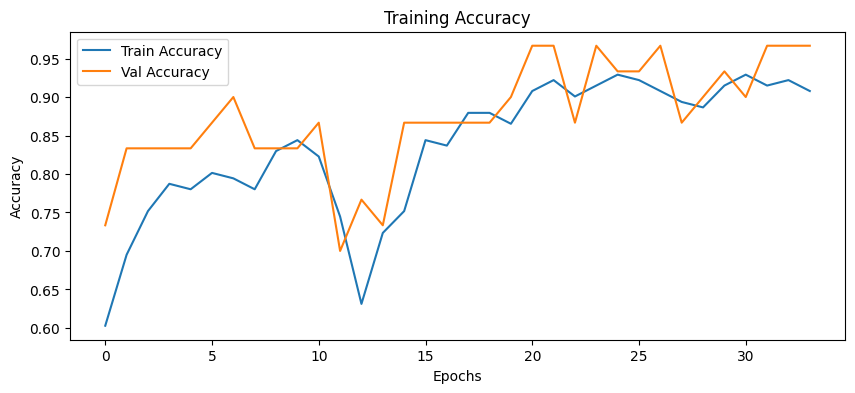

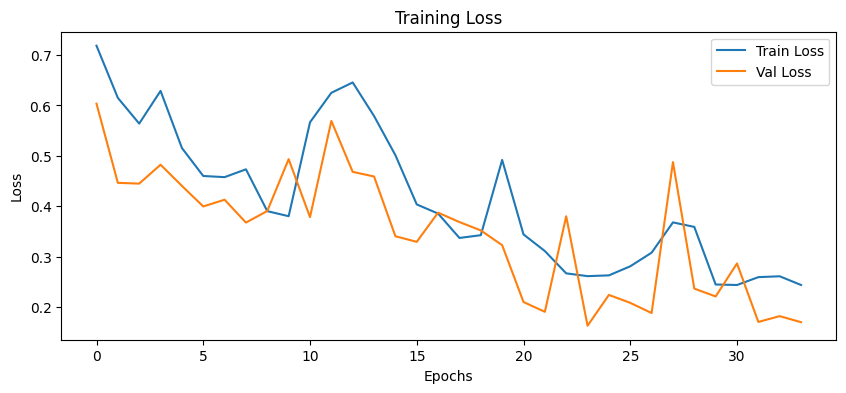

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend(); plt.show()

plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training Loss')
plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend(); plt.show()


In [ ]:
model.save(MODEL_FILE)
print(f"💾 Model saved at: {MODEL_FILE}")

results = {
    "val_accuracy": float(np.max(history.history['val_accuracy'])),
    "val_loss": float(np.min(history.history['val_loss'])),
    "test_accuracy": float(np.mean(test_pred == y_test)),
    "test_roc_auc": float(roc_auc_score(y_test, test_prob))
}

with open(RESULTS_FILE, "w") as f:
    json.dump(results, f, indent=4)

print(f"📊 Metrics saved to: {RESULTS_FILE}")

💾 Model saved at: /content/drive/MyDrive/Colab Notebooks/pd_project/models/parkinson_final_gru_model.keras
📊 Metrics saved to: /content/drive/MyDrive/Colab Notebooks/pd_project/models/results.json


In [ ]:
NEW_FILE = "/content/drive/MyDrive/Colab Notebooks/pd_project/data/healthy_user.csv"


In [ ]:
df_new = pd.read_csv(NEW_FILE, on_bad_lines='skip')

# Drop unnamed empty columns automatically
df_new = df_new.loc[:, ~df_new.columns.str.contains('^Unnamed')]

print("✅ Cleaned columns:", df_new.columns.tolist())


✅ Cleaned columns: ['key', 'code', 'pressTs', 'releaseTs', 'holdTime', 'flightTime', 'latencyTime', 'isError']


In [ ]:
df_new = df_new[["holdTime", "flightTime", "latencyTime"]].dropna().reset_index(drop=True)

df_new_scaled = scaler.transform(df_new)

# Pad/trim to 400
SEQ_LEN = 400
if len(df_new_scaled) < SEQ_LEN:
    pad = np.tile(df_new_scaled[-1], (SEQ_LEN - len(df_new_scaled), 1))
    df_new_scaled = np.vstack([df_new_scaled, pad])
elif len(df_new_scaled) > SEQ_LEN:
    df_new_scaled = df_new_scaled[:SEQ_LEN]

X_new = np.expand_dims(df_new_scaled, axis=0)
print("✅ Final shape ready for prediction:", X_new.shape)


✅ Final shape ready for prediction: (1, 400, 3)


In [ ]:
print(df_new.head(3))
print("Columns:", df_new.columns.tolist())


   holdTime  flightTime  latencyTime
0     170.8     28519.7      27188.9
1     438.5      -238.8       -409.6
2      60.9       394.6        -43.9
Columns: ['holdTime', 'flightTime', 'latencyTime']


In [ ]:
prob = float(model.predict(X_new)[0][0])

if prob < 0.5:
    status = "Healthy"
elif prob < 0.65:
    status = "Mild Parkinson"
elif prob < 0.85:
    status = "Moderate Parkinson"
else:
    status = "Severe Parkinson"

print(f"🧠 Parkinson Probability: {prob:.4f}")
print(f"🩺 Predicted Status: {status}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
🧠 Parkinson Probability: 0.0138
🩺 Predicted Status: Healthy


In [ ]:
newhealthy = "/content/drive/MyDrive/Colab Notebooks/pd_project/data/healthytest.csv"

In [ ]:
df_new = pd.read_csv(newhealthy, on_bad_lines='skip')

# Drop unnamed empty columns automatically
df_new = df_new.loc[:, ~df_new.columns.str.contains('^Unnamed')]

print("✅ Cleaned columns:", df_new.columns.tolist())


✅ Cleaned columns: ['key', 'code', 'pressTs', 'releaseTs', 'holdTime', 'flightTime', 'latencyTime', 'isError']


In [ ]:
df_new = df_new[["holdTime", "flightTime", "latencyTime"]].dropna().reset_index(drop=True)

df_new_scaled = scaler.transform(df_new)

# Pad/trim to 400
SEQ_LEN = 400
if len(df_new_scaled) < SEQ_LEN:
    pad = np.tile(df_new_scaled[-1], (SEQ_LEN - len(df_new_scaled), 1))
    df_new_scaled = np.vstack([df_new_scaled, pad])
elif len(df_new_scaled) > SEQ_LEN:
    df_new_scaled = df_new_scaled[:SEQ_LEN]

X_new = np.expand_dims(df_new_scaled, axis=0)
print("✅ Final shape ready for prediction:", X_new.shape)


✅ Final shape ready for prediction: (1, 400, 3)


In [ ]:
print(df_new.head(3))
print("Columns:", df_new.columns.tolist())

   holdTime  flightTime  latencyTime
0      65.6       153.4        -43.8
1      91.4       192.8        127.2
2      84.8       123.3         31.9
Columns: ['holdTime', 'flightTime', 'latencyTime']


In [ ]:
prob = float(model.predict(X_new)[0][0])

if prob < 0.5:
    status = "Healthy"
elif prob < 0.65:
    status = "Mild Parkinson"
elif prob < 0.85:
    status = "Moderate Parkinson"
else:
    status = "Severe Parkinson"

print(f"🧠 Parkinson Probability: {prob:.4f}")
print(f"🩺 Predicted Status: {status}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
🧠 Parkinson Probability: 0.0264
🩺 Predicted Status: Healthy


In [ ]:
import tensorflow as tf
import joblib
import numpy as np
import pandas as pd

# Paths
BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/pd_project"
MODEL_PATH = f"{BASE_PATH}/models"
MODEL_FILE = f"{MODEL_PATH}/parkinson_final_gru_model.keras"
SCALER_FILE = f"{MODEL_PATH}/scaler.pkl"

# Load model & scaler
model = tf.keras.models.load_model(MODEL_FILE)
scaler = joblib.load(SCALER_FILE)

print("✅ Model and Scaler loaded successfully!")


✅ Model and Scaler loaded successfully!


In [ ]:
 = 400  # must match training sequence length
NEW_FILE = "/content/drive/MyDrive/Colab Notebooks/pd_project/data/severepar.csv"  # change this path

# Read CSV (ignore malformed rows)
df = pd.read_csv(NEW_FILE, on_bad_lines='skip')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df[["holdTime", "flightTime", "latencyTime"]].dropna().reset_index(drop=True)

# Optional: convert ms → seconds if needed
# df[["holdTime", "flightTime", "latencyTime"]] /= 1000.0

# Normalize
df_scaled = scaler.transform(df)

# Pad / trim to sequence length
if len(df_scaled) < SEQ_LEN:
    pad = np.tile(df_scaled[-1], (SEQ_LEN - len(df_scaled), 1))
    df_scaled = np.vstack([df_scaled, pad])
elif len(df_scaled) > SEQ_LEN:
    df_scaled = df_scaled[:SEQ_LEN]

# Prepare model input
X_new = np.expand_dims(df_scaled, axis=0)SEQ_LEN
print("✅ Input ready for prediction:", X_new.shape)

✅ Input ready for prediction: (1, 400, 3)


In [ ]:
# Predict
prob = float(model.predict(X_new, verbose=0)[0][0])

# Interpret
if prob < 0.5:
    status = "Healthy"
elif prob < 0.65:
    status = "Mild Parkinson"
elif prob < 0.85:
    status = "Moderate Parkinson"
else:
    status = "Severe Parkinson"

print(f"🧠 Parkinson Probability: {prob:.4f}")
print(f"🩺 Predicted Status: {status}")

🧠 Parkinson Probability: 0.9703
🩺 Predicted Status: Severe Parkinson


In [ ]:
import tensorflow as tf
import joblib
import numpy as np
import pandas as pd

# Paths
BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/pd_project"
MODEL_PATH = f"{BASE_PATH}/models"
MODEL_FILE = f"{MODEL_PATH}/parkinson_final_gru_model.keras"
SCALER_FILE = f"{MODEL_PATH}/scaler.pkl"

# Load model & scaler
model = tf.keras.models.load_model(MODEL_FILE)
scaler = joblib.load(SCALER_FILE)

print("✅ Model and Scaler loaded successfully!")

✅ Model and Scaler loaded successfully!


In [ ]:
SEQ_LEN = 400  # must match training sequence length
NEW_FILE = "/content/drive/MyDrive/Colab Notebooks/pd_project/data/mildpar.csv"  # change this path

# Read CSV (ignore malformed rows)
df = pd.read_csv(NEW_FILE, on_bad_lines='skip')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df[["holdTime", "flightTime", "latencyTime"]].dropna().reset_index(drop=True)

# Optional: convert ms → seconds if needed
# df[["holdTime", "flightTime", "latencyTime"]] /= 1000.0

# Normalize
df_scaled = scaler.transform(df)

# Pad / trim to sequence length
if len(df_scaled) < SEQ_LEN:
    pad = np.tile(df_scaled[-1], (SEQ_LEN - len(df_scaled), 1))
    df_scaled = np.vstack([df_scaled, pad])
elif len(df_scaled) > SEQ_LEN:
    df_scaled = df_scaled[:SEQ_LEN]

# Prepare model input
X_new = np.expand_dims(df_scaled, axis=0)
print("✅ Input ready for prediction:", X_new.shape)

✅ Input ready for prediction: (1, 400, 3)


In [ ]:
# Predict
prob = float(model.predict(X_new, verbose=0)[0][0])

# Interpret
if prob < 0.5:
    status = "Healthy"
elif prob < 0.65:
    status = "Mild Parkinson"
elif prob < 0.85:
    status = "Moderate Parkinson"
else:
    status = "Severe Parkinson"

print(f"🧠 Parkinson Probability: {prob:.4f}")
print(f"🩺 Predicted Status: {status}")

🧠 Parkinson Probability: 0.9274
🩺 Predicted Status: Severe Parkinson
